In [143]:
import os
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt

os.getcwd()

'/Users/marekerben/Desktop/Prakticka'

In [116]:
#Loading data
quotes_df = pd.read_csv('quotes-binance-btc-2020-11-15.csv.gz')
trades_df = pd.read_csv('trades-binance-btcusdt-2020-11-15.csv.gz')
print(quotes_df.head(), trades_df.head())

          exchange   symbol         timestamp   local_timestamp  ask_amount  \
0  binance-futures  BTCUSDT  1605398403538000  1605398403818508       2.168   
1  binance-futures  BTCUSDT  1605398403837000  1605398403862839       2.168   
2  binance-futures  BTCUSDT  1605398403891000  1605398403904974       2.120   
3  binance-futures  BTCUSDT  1605398403981000  1605398403992118       2.120   
4  binance-futures  BTCUSDT  1605398404056000  1605398404077327       2.120   

   ask_price  bid_price  bid_amount  
0    16068.8   16068.79       3.639  
1    16068.8   16068.79       3.660  
2    16068.8   16068.79       3.771  
3    16068.8   16068.79       3.837  
4    16068.8   16068.79       3.841             exchange   symbol         timestamp   local_timestamp         id  \
0  binance-futures  BTCUSDT  1605398403494000  1605398403504834  267330004   
1  binance-futures  BTCUSDT  1605398403494000  1605398403506164  267330005   
2  binance-futures  BTCUSDT  1605398403494000  1605398403506173

In [117]:
#controlling for NAs
print(quotes_df.isna().sum())

exchange           0
symbol             0
timestamp          0
local_timestamp    0
ask_amount         0
ask_price          0
bid_price          0
bid_amount         0
dtype: int64


In [118]:
#Adding timastamp
timestamp = quotes_df['timestamp'] / 1000000
local_timestamp = quotes_df['local_timestamp'] / 1000000
utc_timestamp = []
utc_local_timestamp = []
for i in range(len(timestamp)):
    utc_datetime = datetime.datetime.utcfromtimestamp(timestamp[i])
    utc_timestamp.append(utc_datetime)
    local_datetime = datetime.datetime.utcfromtimestamp(local_timestamp[i])
    utc_local_timestamp.append(local_datetime)

quotes_df['utc_timestamp'] = utc_timestamp
quotes_df['utc_local_timestamp'] = utc_local_timestamp
quotes_df

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,utc_timestamp,utc_local_timestamp
0,binance-futures,BTCUSDT,1605398403538000,1605398403818508,2.168,16068.80,16068.79,3.639,2020-11-15 00:00:03.538,2020-11-15 00:00:03.818508
1,binance-futures,BTCUSDT,1605398403837000,1605398403862839,2.168,16068.80,16068.79,3.660,2020-11-15 00:00:03.837,2020-11-15 00:00:03.862839
2,binance-futures,BTCUSDT,1605398403891000,1605398403904974,2.120,16068.80,16068.79,3.771,2020-11-15 00:00:03.891,2020-11-15 00:00:03.904974
3,binance-futures,BTCUSDT,1605398403981000,1605398403992118,2.120,16068.80,16068.79,3.837,2020-11-15 00:00:03.981,2020-11-15 00:00:03.992118
4,binance-futures,BTCUSDT,1605398404056000,1605398404077327,2.120,16068.80,16068.79,3.841,2020-11-15 00:00:04.056,2020-11-15 00:00:04.077327
...,...,...,...,...,...,...,...,...,...,...
947205,binance-futures,BTCUSDT,1605484799686000,1605484799700882,0.001,15952.00,15951.91,0.021,2020-11-15 23:59:59.686,2020-11-15 23:59:59.700882
947206,binance-futures,BTCUSDT,1605484799738000,1605484799750045,0.001,15952.00,15951.92,0.052,2020-11-15 23:59:59.738,2020-11-15 23:59:59.750045
947207,binance-futures,BTCUSDT,1605484799783000,1605484799795359,0.001,15952.00,15951.93,0.026,2020-11-15 23:59:59.783,2020-11-15 23:59:59.795359
947208,binance-futures,BTCUSDT,1605484799826000,1605484799838128,0.001,15952.00,15951.94,0.017,2020-11-15 23:59:59.826,2020-11-15 23:59:59.838128


In [119]:
#Computing mid price
tick_size = 10
quotes_df['mid_price'] = (quotes_df['ask_price'] + quotes_df['bid_price']) / (2 * tick_size)

In [120]:
#Computing OFI beginning
nrows = quotes_df.shape[0]
e = [None]

for n in range(1, nrows):
    e.append(quotes_df['bid_amount'][n] * (quotes_df['bid_price'][n] >= quotes_df['bid_price'][n-1]) 
             - quotes_df['bid_amount'][n-1] * (quotes_df['bid_price'][n] <= quotes_df['bid_price'][n-1])
             - quotes_df['ask_amount'][n] * (quotes_df['ask_price'][n] <= quotes_df['ask_price'][n-1])
             + quotes_df['ask_amount'][n-1] * (quotes_df['ask_price'][n] >= quotes_df['ask_price'][n-1])
             )

quotes_df['e_n'] = e

In [121]:
quotes_df.head(10)

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,utc_timestamp,utc_local_timestamp,mid_price,e_n
0,binance-futures,BTCUSDT,1605398403538000,1605398403818508,2.168,16068.80,16068.79,3.639,2020-11-15 00:00:03.538,2020-11-15 00:00:03.818508,1606.8795,NaN
1,binance-futures,BTCUSDT,1605398403837000,1605398403862839,2.168,16068.80,16068.79,3.660,2020-11-15 00:00:03.837,2020-11-15 00:00:03.862839,1606.8795,0.021
2,binance-futures,BTCUSDT,1605398403891000,1605398403904974,2.120,16068.80,16068.79,3.771,2020-11-15 00:00:03.891,2020-11-15 00:00:03.904974,1606.8795,0.159
3,binance-futures,BTCUSDT,1605398403981000,1605398403992118,2.120,16068.80,16068.79,3.837,2020-11-15 00:00:03.981,2020-11-15 00:00:03.992118,1606.8795,0.066
4,binance-futures,BTCUSDT,1605398404056000,1605398404077327,2.120,16068.80,16068.79,3.841,2020-11-15 00:00:04.056,2020-11-15 00:00:04.077327,1606.8795,0.004
5,binance-futures,BTCUSDT,1605398404103000,1605398404116938,2.126,16068.80,16068.79,3.934,2020-11-15 00:00:04.103,2020-11-15 00:00:04.116938,1606.8795,0.087
6,binance-futures,BTCUSDT,1605398404147000,1605398404161078,3.099,16069.87,16069.86,10.479,2020-11-15 00:00:04.147,2020-11-15 00:00:04.161078,1606.9865,12.605
7,binance-futures,BTCUSDT,1605398404190000,1605398404200170,5.099,16069.87,16069.86,1.057,2020-11-15 00:00:04.190,2020-11-15 00:00:04.200170,1606.9865,-11.422
8,binance-futures,BTCUSDT,1605398404233000,1605398404244055,4.912,16069.87,16069.86,1.069,2020-11-15 00:00:04.233,2020-11-15 00:00:04.244055,1606.9865,0.199
9,binance-futures,BTCUSDT,1605398404269000,1605398404283223,4.912,16069.87,16069.86,1.119,2020-11-15 00:00:04.269,2020-11-15 00:00:04.283223,1606.9865,0.050


In [122]:
quotes_df.set_index('utc_timestamp', inplace = True)

In [123]:
quotes_df.loc['2020-11-15 00:00:00' : '2020-11-15 00:00:10'].e_n.sum()

-12.251999999999997

In [124]:
quotes_df.groupby([pd.Grouper(freq = '10S', level = 'utc_timestamp')]).e_n.sum()

utc_timestamp
2020-11-15 00:00:00   -16.863
2020-11-15 00:00:10    48.922
2020-11-15 00:00:20    40.583
2020-11-15 00:00:30    26.957
2020-11-15 00:00:40    -8.038
                        ...  
2020-11-15 23:59:10   -31.384
2020-11-15 23:59:20   -14.828
2020-11-15 23:59:30     4.667
2020-11-15 23:59:40    53.597
2020-11-15 23:59:50    60.293
Freq: 10S, Name: e_n, Length: 8640, dtype: float64

In [125]:
deltaPrice_OFI = pd.DataFrame({'delta_midprice': quotes_df.mid_price.resample('10S').apply(lambda x: x[x.last_valid_index()] - x[x.first_valid_index()]),
                               'OFI':quotes_df.e_n.resample('10S').sum()})
deltaPrice_OFI

,delta_midprice,OFI
utc_timestamp,,
2020-11-15 00:00:00,-0.0790,-16.863
2020-11-15 00:00:10,-0.3010,48.922
2020-11-15 00:00:20,0.4145,40.583
2020-11-15 00:00:30,0.2820,26.957
2020-11-15 00:00:40,0.1820,-8.038
...,...,...
2020-11-15 23:59:10,0.2630,-31.384
2020-11-15 23:59:20,-0.2340,-14.828
2020-11-15 23:59:30,0.0930,4.667


In [137]:
deltaPrice_OFI.resample('30T').OFI.agg([np.mean, np.std])

,mean,std
utc_timestamp,,
2020-11-15 00:00:00,1.993739,37.484656
2020-11-15 00:30:00,1.344144,58.101390
2020-11-15 01:00:00,8.555261,95.089364
2020-11-15 01:30:00,5.099611,67.169784
2020-11-15 02:00:00,9.284328,64.600046
2020-11-15 02:30:00,9.205317,63.683645
2020-11-15 03:00:00,-11.148444,86.328484
2020-11-15 03:30:00,-1.555539,81.523018
2020-11-15 04:00:00,13.269289,86.237405


In [142]:
deltaPrice_OFI.to_csv('/Users/marekerben/Desktop/Prakticka/OFI_mean_stdfor30mins.csv')

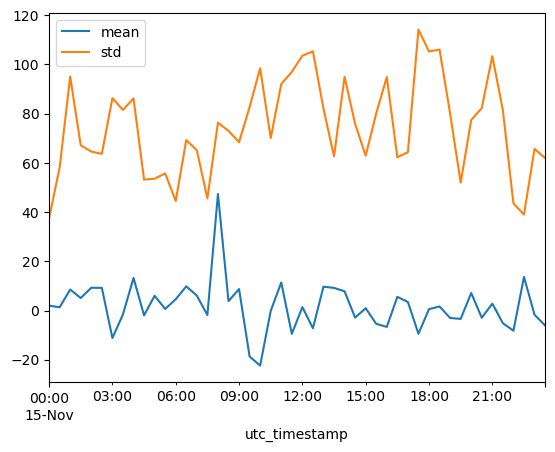

<Figure size 640x480 with 0 Axes>

In [144]:
deltaPrice_OFI.resample('30T').OFI.agg([np.mean, np.std]).plot()
plt.show()
plt.savefig('15.11.2020_OFI_mean_std.pdf')

In [126]:
import statsmodels.api as sm

ofiModel = sm.formula.ols('delta_midprice ~ OFI', data=deltaPrice_OFI).fit()

In [127]:
ofiModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         delta_midprice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     8725.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:59:22   Log-Likelihood:                -1007.2
No. Observations:                8640   AIC:                             2018.
Df Residuals:                    8638   BIC:                             2033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0076      0.003     -2.611      0.009      -0.013      -0.002
OFI            0.0035   3.77e-05     93.409      0.000       0.003       0.004
==============================================================================
Omnibus:                     1214.360   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17488.808
Skew:                          -0.053   Prob(JB):                         0.00
Kurtosis:                       9.969   Cond. No.                         77.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
df.to_csv('Prvni_vypocty.csv.gz', compression = 'gzip')